In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
%matplotlib inline

In [2]:
import os, shutil
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in sorted(glob(os.path.join('../data/M51/raw/', 'j*_flc.fits'))):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/M51/raw/M51_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [13]:
files = {'F435W': ['../data/M51/raw/M51_F435W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)],
         #'F606W': ['../data/M51/raw/M51_F606W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)],
         'F814W': ['../data/M51/raw/M51_F814W_EXP{:d}_flc.fits'.format(i) for i in range(1, 5)]}
outputs = {'F435W': '../data/M51/reduced/M51_F435W_drc.fits',
          #'F606W': '../data/M51/reduced/M51_F606W_drc.fits',
          'F814W': '../data/M51/reduced/M51_F814W_drc.fits'}
diff_im = '../data/M51/reduced/M51_B-I.fits'
darks = {}

In [10]:
from drizzlepac import tweakreg

# Alignment and Drizzling

In [11]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/M51/calibration/'

In [12]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F814W', verbose=True, realign_only=False)

*******************************
Initial Alignment and Drizzling
--F814W: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F814W', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 15:34:21.986 (22/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F814W_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F814W_EXP2_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F814W_EXP3_flc.fits
    /Users/bco

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: -5.622984376910536e-07 -1.3970724895780875e-05
CD_21  CD_22: -1.3837859869030459e-05 -3.945167756872236e-07
CRVAL    : 202.52815598863228 47.21559935947206
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049857746361523285
ORIENTAT : -91.61753529761076
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: -7.313897074780477e-07 -1.3501588188043552e-05
CD_21  CD_22: -1.3668176131190001e-05 -4.919796263851815e-07
CRVAL    : 202.48564892773743 47.21471556088199
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927616612063045
ORIENTAT : -92.08685747210284
WCSNAME  :  TWEAK_F814W


Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: -5.624339791372689e-07 -1.3970689620566581e-05
CD_21  CD_22: -1.3837815265691687e-05 -3.9437861918475576e-07
CRVAL    : 202.52819198283802 47.215630035568864
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049857605733675384
ORIENTAT : -91.61697323152535
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: -7.315231259914339e-07 -1.350155517173843e-05
CD_21  CD_22: -1.3668130355383192e-05 -4.918457838098656e-07
CRVAL    : 202.48568500355165 47.214746522696586
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927602721140954
ORIENTAT : -92.08629534357736
WCSNAME  :  TWEAK_F814W

....Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP3_flc.fits...


Processing 

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: -5.629365824529423e-07 -1.3970724203335081e-05
CD_21  CD_22: -1.3837815401522981e-05 -3.9386982445087576e-07
CRVAL    : 202.52937176219015 47.215685106435885
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985767973767814
ORIENTAT : -91.61488425615568
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP3_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: -7.320197009332234e-07 -1.350159263007496e-05
CD_21  CD_22: -1.3668124067771419e-05 -4.913542922385008e-07
CRVAL    : 202.48686462946117 47.21480264491053
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04927610018567201
ORIENTAT : -92.08420661300845
WCSNAME  :  TWEAK_F814W

....Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP4_flc.fits...


Processing /U

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP4_flc.fits[1]
WCS Keywords

CD_11  CD_12: -5.627587035521577e-07 -1.3970707050674931e-05
CD_21  CD_22: -1.3837809955294918e-05 -3.9405270005242865e-07
CRVAL    : 202.52941033415496 47.215723357180615
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04985763411821821
ORIENTAT : -91.61563563972072
WCSNAME  :  TWEAK_F814W

Processing /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP4_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/M51/raw/M51_F435W_EXP4_flc.fits[4]
WCS Keywords

CD_11  CD_12: -7.318440125834409e-07 -1.350157461271113e-05
CD_21  CD_22: -1.3668120994541214e-05 -4.915309274556738e-07
CRVAL    : 202.48690322445805 47.214840517791096
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049276055315043615
ORIENTAT : -92.08495797578561
WCSNAME  :  TWEAK_F814W
--F435W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/M51/reduced/M51_F435W_drc.fits

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 15:43:29.513 (22/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F814W_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F435W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F814W_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F814W_drc.fits', EXT=('SCI', 1) started at: 15:43:29.690 (22/03/2019)
     Found 5786 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F814W_drc.fits': 5786

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/M51/reduced/M51_F435W_drc.fits':
  #  Sou

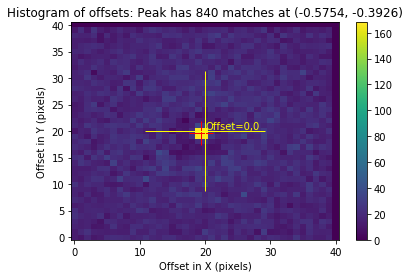

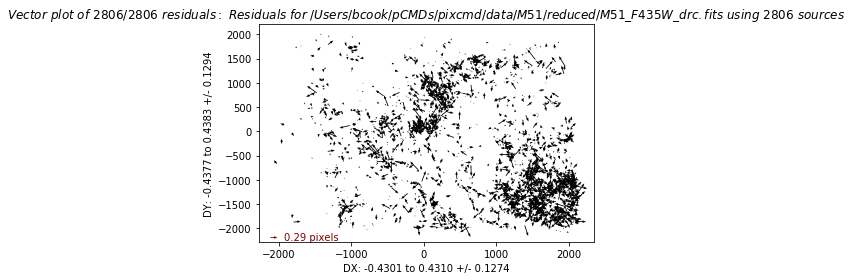

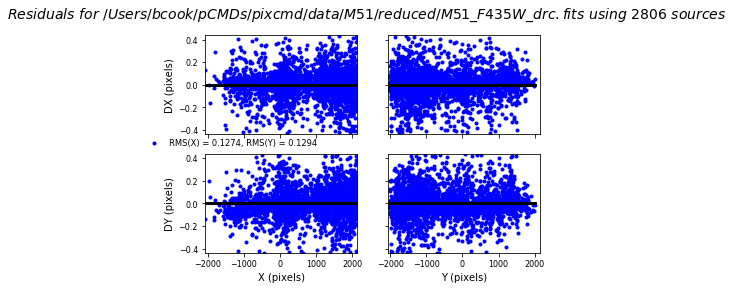

In [14]:
tweakreg.TweakReg([outputs['F814W'], outputs['F435W']], conv_width=4.0, threshold=100, nclip=10, shiftfile=False, writecat=False, clean=True,
                 interactive=False, updatehdr=False)

In [18]:
# Create difference image to check alignment
f1 = fits.open(outputs['F814W'])
f2 = fits.open(outputs['F435W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

# Automatic Source Extraction

In [22]:
ppy.data.alignment._add_flag(outputs['F814W'], exp_ratio=0.9)
ppy.data.alignment._add_flag(outputs['F435W'], exp_ratio=0.9)

In [23]:
# %%time
# box = 8
# ppy.data.sources.estimate_background(outputs['F814W'], bkg_kwargs={'bw':box, 'bh':box})

In [24]:
# %%time
# ppy.data.sources.mask_sources_auto(outputs['F814W'], threshold=10.0)

# Manual Source Extraction

In [16]:
ppy.data.sources.mask_sources_manual(outputs['F814W'], '../data/M51/masks/M51_F814W.reg')

In [17]:
# compute regions using only source masks
ppy.data.sources._add_masked(outputs['F814W'], mask_flags=[ppy.data.utils.ALL_FLAGS['SEXTRACTOR'],
                                                            ppy.data.utils.ALL_FLAGS['MANUAL']])

# Combine Masks

In [18]:
ppy.data.utils.combine_flags(outputs)

# Compute Regions

In [19]:
regions = ppy.data.extraction.add_regions(outputs, '../data/M51/masks/M51_F814W_contours.reg', base_filter='F814W', xc=2815, yc=2600)

100%|██████████| 91/91 [08:08<00:00,  5.36s/it]


# Extract PCMDs

In [20]:
pcmds = ppy.data.extraction.save_pcmds(outputs, 'F814W', 'F435W', path='../data/M51/pcmds/', name_append='M51_I_BI')

Filter: F814W
Observation Date: 53746 (MJD)
Vega ZeroPoint: 25.5274
AB ZeroPoint: 25.9556
ST ZeroPoint: 26.7919
Exposure Time: 2880.0
A pre-made filter is available
Filter: F606W
Observation Date: 53746 (MJD)
Vega ZeroPoint: 26.4187
AB ZeroPoint: 26.5116
ST ZeroPoint: 26.6808
Exposure Time: 3000.0
A pre-made filter is available


100%|██████████| 360/360 [00:50<00:00,  7.09it/s]


In [21]:
pcmds.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

# Check

In [9]:
pcmds = {}
for i in tqdm(range(1, 341)):
    filename = f'../data/M51/pcmds/M51_I_BI_{i}.pcmd'
    try:
        pcmds[i] = np.loadtxt(filename, unpack=True)
    except OSError:
        continue
    if len(pcmds[i]) == 0:
        pcmds.pop(i)
        os.remove(filename)

100%|██████████| 323/323 [00:19<00:00, 16.40it/s]


In [22]:
keys = np.array(list(pcmds.keys()))

In [23]:
keys

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [24]:
Neffs = {i: np.sqrt(pcmds[i].shape[1]) for i in pcmds.keys()}

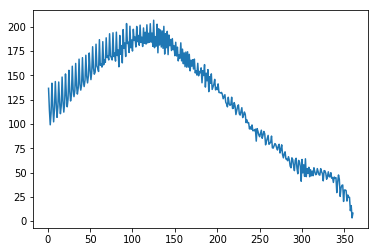

In [25]:
plt.plot(Neffs.keys(), Neffs.values())

In [26]:
f = ppy.instrument.default_m51_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)

In [27]:
dmod = 31.0

In [28]:
ppy.distancemodels.dmod_to_mpc(dmod)

15.848931924611142

In [29]:
driv = ppy.driver.Driver(iso_model, gpu=False)

In [33]:
gal_3 = ppy.galaxy.SSPSimple(np.array([0., -2., 3., 10.]), dmod=dmod)
gal_4 = ppy.galaxy.SSPSimple(np.array([0., -2., 4., 10.]), dmod=dmod)
gal_5 = ppy.galaxy.SSPSimple(np.array([0., -2., 5., 10.]), dmod=dmod)
gal_6 = ppy.galaxy.SSPSimple(np.array([0., -2., 6., 10.]), dmod=dmod)

In [34]:
sky = [292.8, 377.1]

In [35]:
pcmd_3, _ = driv.simulate(gal_3, 256, sky_noise=sky)
pcmd_4, _ = driv.simulate(gal_4, 256, sky_noise=sky)
pcmd_5, _ = driv.simulate(gal_5, 256, sky_noise=sky)
pcmd_6, _ = driv.simulate(gal_6, 256, sky_noise=sky)

In [39]:
is_dark = False
for i in tqdm(np.unique((keys-1)//4)):
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), sharex=True, sharey=True)
    axes = [axes[0,1], axes[0,0], axes[1,0], axes[1,1]] # 4 quadrants
    for j in range(4):
        k = j + 1 + 4*i
        if k not in pcmds:
            continue
        pcmd = pcmds[k]
        if len(pcmd[0]) <= 10:
            continue
        ppy.plotting.plot_pcmd(pcmd, ax=axes[j])
        ppy.plotting.plot_pcmd_contours(pcmd_3, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_4, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_5, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        ppy.plotting.plot_pcmd_contours(pcmd_6, keep_limits=True, ax=axes[j], alpha=0.3, color=('w' if is_dark else 'k'))
        axes[j].set_title('Region {:d}, Neff = {:.0f}'.format(k, np.sqrt(pcmd.shape[1])))
        ppy.plotting.plot_isochrone(iso_model, dmod=30.25, axes=axes[j], mag_system='vega')
        axes[j].axhline(y=f[0].counts_to_mag(sky[0]), color='r', ls='--')
    axes[0].set_xlim([0, 3])
    axes[0].set_ylim([31, 22])
    plt.tight_layout()
    try:
        plt.savefig(f'figures/M51/M51_s{i}_pcmds.pdf')
    except TypeError:
        pass
    plt.close()

100%|██████████| 90/90 [02:02<00:00,  1.36s/it]
